In [86]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
from itertools import combinations
from IPython.display import display
from statsmodels.multivariate.manova import MANOVA

'''
Using function now instead of writing things over and over again 
'''

'\nUsing function now instead of writing things over and over again \n'

In [87]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions as pf
import read_data_functions as rdf
import Statistics
from initializer import InitialThangs
from Subject_Object_v3 import perc
%load_ext autoreload
%autoreload 2
'''
'''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\n'

## Initial Thangs

In [88]:
EXPERIMENT = "Exp2"
it = InitialThangs(EXPERIMENT)

In [89]:
plt.style.use(r'C:\Users\Seth Sullivan\anaconda3\Lib\site-packages\matplotlib\mpl-data\stylelib\cashaback_light.mplstyle')
wheel = dv.ColorWheel()
os.getcwd()

'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_Exp2'

## Pickle Objects

In [90]:
if "group" not in locals():
    group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
else:
    if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
        group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
        
it2 = InitialThangs(experiment="Exp2")

# Create DataFrame

In [91]:
react_mixed_median  = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('react','mixed'),axis=1)
react_only_median   = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('react','only'),axis=1)
guess_mixed_median = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','mixed'),axis=1)
guess_only_median  = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','only'),axis=1)
reaction_time_median = np.vstack((react_mixed_median,guess_mixed_median,react_only_median,guess_only_median)).T.flatten()

react_mixed_sd  = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('react','mixed'),axis=1)
react_only_sd   = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('react','only'),axis=1)
guess_mixed_sd = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','mixed'),axis=1)
guess_only_sd  = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','only'),axis=1)
reaction_time_sd    = np.vstack((react_mixed_sd,guess_mixed_sd,react_only_sd,guess_only_sd)).T.flatten()

subject_number = np.repeat(np.arange(1, it2.num_subjects + 1, 1, dtype=int), it.num_blocks)
condition = np.tile(np.arange(1, 4 + 1, 1, dtype=int), it2.num_subjects)    
factor1 = np.tile(["React","Guess"], it2.num_subjects*2)
factor2 = np.tile(["Mixed", "Mixed","Only","Only"], it2.num_subjects)

df_metrics = pd.DataFrame(np.array([reaction_time_median,reaction_time_sd]).T,
                          columns=["Reaction_Time_Median","Reaction_Time_SD"])
df_conditions = pd.DataFrame(np.array([subject_number, condition, factor1, factor2]).T, 
                             columns=["Subject", "Condition", "Factor_1", "Factor_2"])

df2 = pd.concat([df_conditions, df_metrics], axis=1)
df2

,Subject,Condition,Factor_1,Factor_2,Reaction_Time_Median,Reaction_Time_SD
0,1,1,React,Mixed,326.218536,33.611477
1,1,2,Guess,Mixed,366.903442,64.895992
2,1,3,React,Only,296.959229,18.933498
3,1,4,Guess,Only,274.025757,38.617895
4,2,1,React,Mixed,319.786163,53.684984
...,...,...,...,...,...,...
91,23,4,Guess,Only,339.617035,72.820395
92,24,1,React,Mixed,423.189148,59.148601
93,24,2,Guess,Mixed,526.726227,47.918337
94,24,3,React,Only,369.821320,27.611786


## Initialize Stats

In [92]:
stats_inputs = Statistics.Inputs(df=df2, experiment = EXPERIMENT, num_subjects = it2.num_subjects, num_blocks=it2.num_blocks,num_trials=it2.num_trials,
                           trial_block_titles=it2.trial_block_titles, xlab=it2.xlabel, f1_xticklabels=it2.f1_collapse_xticklabs,
                           f2_xticklabels=it2.f2_collapse_xticklabs,f1_xlabel=it2.f1_xlabel,f2_xlabel=it2.f2_xlabel,
                           M = 1e6)

## Anova

In [93]:
rt_median_anova = Statistics.Anova("Reaction_Time_Median", stats_inputs,anova_type="rm_anova")
rt_median_anova.anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Factor_1,32255.197044,1,23,32255.197044,75.468032,1.013779e-08,1.013779e-08,0.165221,1.0
1,Factor_2,86981.964858,1,23,86981.964858,83.039497,4.282971e-09,4.282971e-09,0.347996,1.0
2,Factor_1 * Factor_2,52596.931009,1,23,52596.931009,147.694082,1.715832e-11,1.715832e-11,0.243994,1.0


## Bootstrap

In [94]:
reaction_time_median_boot = Statistics.Bootstrap(stats_inputs, rt_median_anova, change_m=None, alternative='two-sided', test='mean')
pvals,cles = reaction_time_median_boot.run_bootstrap()

Significant interaction, doing pairwise bootstraps for each condition...


## Plots

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

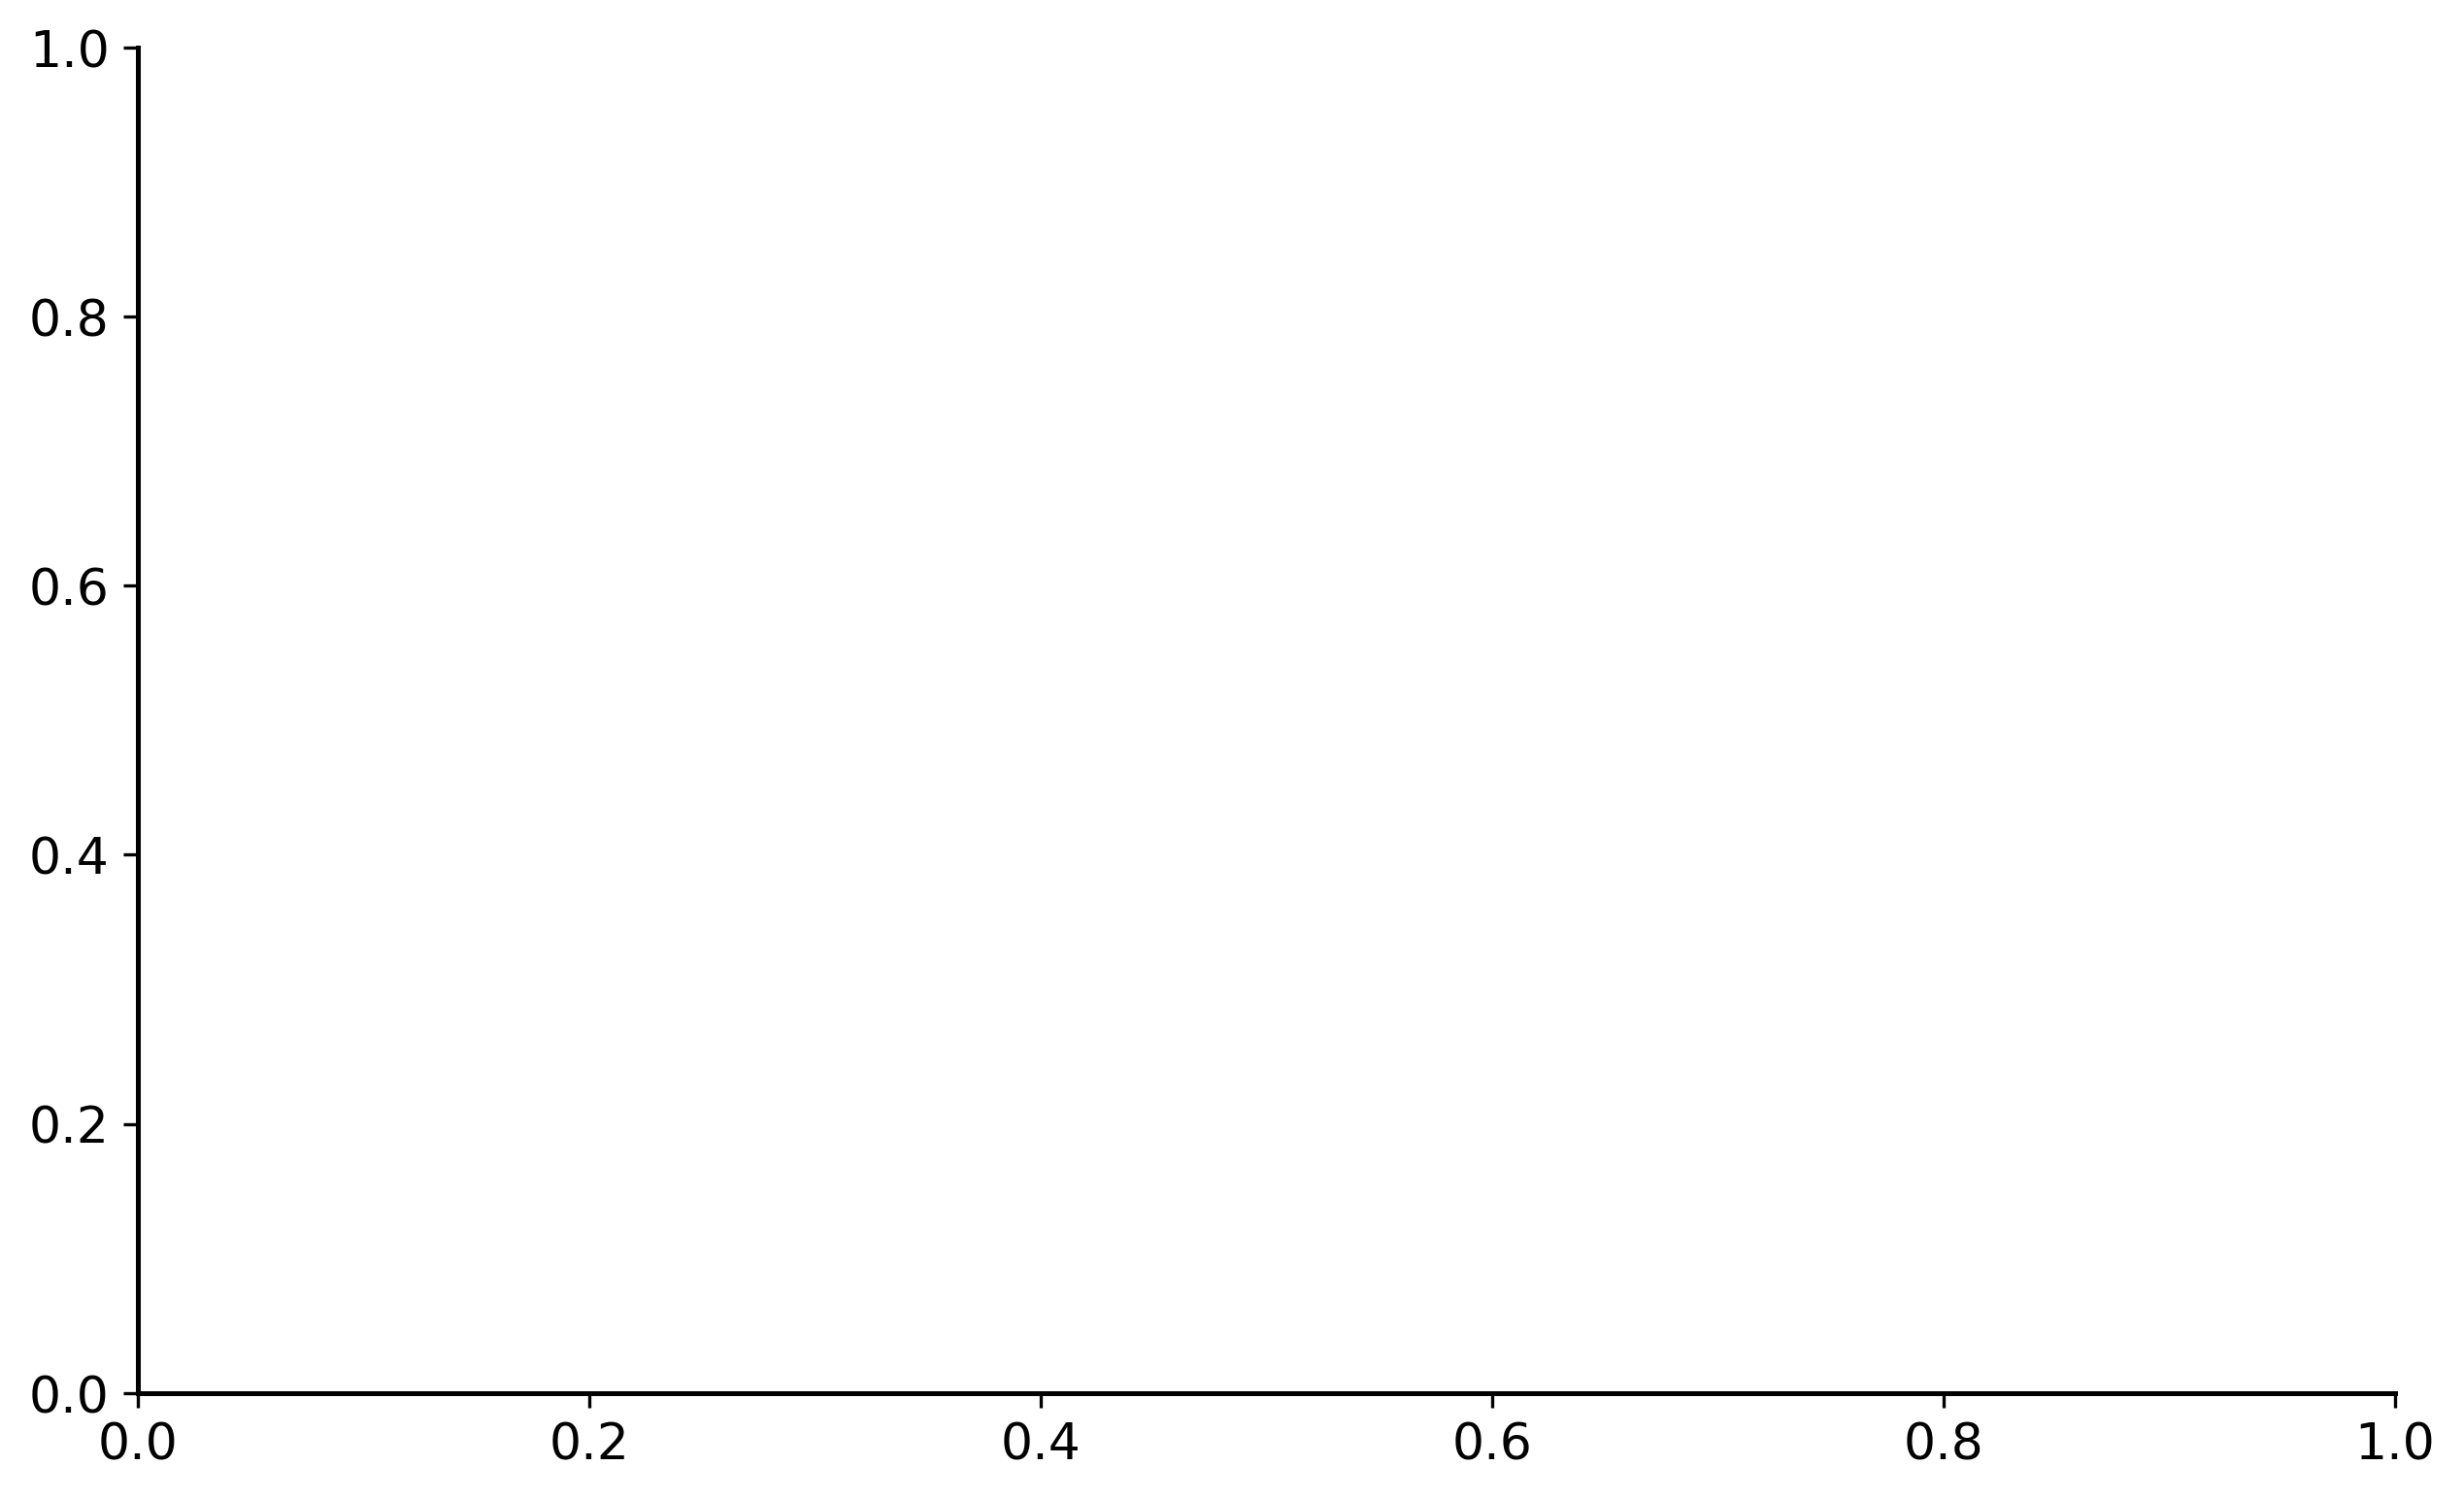

In [95]:
metric = df2['Reaction_Time_Median']

fig,ax = plt.subplots(figsize = (10,6))

dv.boxplot(reaction_time_median[:,0],x_pos = 0,ax=ax)
dv.boxplot(reaction_time_median[:,1],x_pos = 1,ax=ax)
dv.boxplot(reaction_time_median[:,2],x_pos = 2,ax=ax)
dv.boxplot(reaction_time_median[:,3],x_pos = 3,ax=ax)
dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data = [react_mixed_median,guess_mixed_median,react_only_median,guess_only_median],circle_size = 40,include_mean=False)

statline_y = 475
shift = 25
xlocs = np.arange(0,5,1)
combos = ['01','23','13','02']
for c in combos:
    a = int(c[0])
    b = int(c[1])
    if pvals[c]<0.05:
        dv.stat_annotation(ax,xlocs[a],xlocs[b],statline_y,p_val=pvals[c],cles=cles[c],
                        fontsize=12,h=5)
        statline_y += shift
xlabs = ['React (Mixed)','Guess (Mixed)','React (Only React)','Guess (Only Guess)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(250,600,50))
ax.set_xticklabels(xlabs)
ax.set_ylabel('Median Reaction Time (ms)')
# ax.set_title('Median Reaction Time (ms)')

In [ ]:
pvals,cles = so.pairwise_bootstrap(reaction_time_std,condition_nums = condition_nums,M=1e4,test='mean')

NameError: name 'so' is not defined

Text(0.5, 1.0, 'Reaction Time SD (ms)')

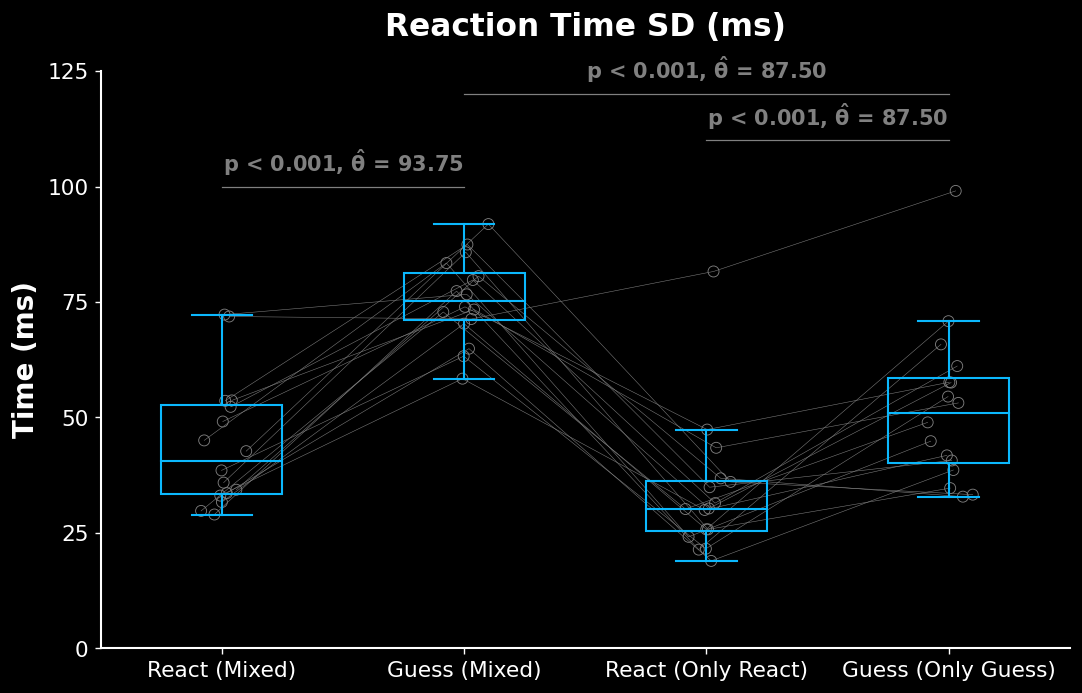

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
dv.boxplot(reaction_time_std[:,0],x_pos = 0,ax=ax)
dv.boxplot(reaction_time_std[:,1],x_pos = 1,ax=ax)
dv.boxplot(reaction_time_std[:,2],x_pos = 2,ax=ax)
dv.boxplot(reaction_time_std[:,3],x_pos = 3,ax=ax)
dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data_list = [react_mixed_std,guess_mixed_std,react_only_std,guess_only_std],circle_size = 40,include_mean=False)

statline_y = 100
shift = 10
xlocs = np.arange(0,5,1)
combos = so.create_combos(condition_nums)
combos = ['01','23','13']
for c in combos:
    a = int(c[0])
    b = int(c[1])
    if pvals[c]<0.05:
        dv.stat_annotation(ax,xlocs[a],xlocs[b],statline_y,p_val=pvals[c],cles=cles[c],
                        fontsize=12,h=2)
        statline_y += shift
xlabs = ['React (Mixed)','Guess (Mixed)','React (Only React)','Guess (Only Guess)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(0,150,25))
ax.set_xticklabels(xlabs)
ax.set_ylabel('SD Reaction Time SD (ms)')
# ax.set_title('SD Reaction Time SD (ms)',pad=20)